In [1]:
import pandas as pd
# 파일을 DataFrame으로 읽어오는 코드 예시
df = pd.read_csv("//home/iai/Desktop/son/capstone/classimbalance/cifar100-lt/imb_fact_100/total/results/experiment_results.txt", sep=", ")

# 데이터 타입 변환
df["ACC Mean"] = df["ACC Mean"].astype(float)
df["ACC Std"] = df["ACC Std"].astype(float)
df["ECE Mean"] = df["ECE Mean"].astype(float)
df["ECE Std"] = df["ECE Std"].astype(float)

# DataFrame 확인
df.head()


/tmp/ipykernel_1670441/1162723274.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("//home/iai/Desktop/son/capstone/classimbalance/cifar100-lt/imb_fact_100/total/results/experiment_results.txt", sep=", ")


KD Method Teacher Calibration Student Calibration        Mixup  ACC Mean  \
0       VKD               TNone                  CE  Mixup=False     37.88   
1       VKD               TNone                  CE   Mixup=True     38.98   
2       VKD               TNone                 ALS  Mixup=False     38.73   
3       VKD               TNone                 ALS   Mixup=True     33.27   
4       VKD               TNone   ConfidencePenalty  Mixup=False     36.34   

   ACC Std  ECE Mean  ECE Std  
0     0.60    0.1578   0.0053  
1     0.41    0.1453   0.0095  
2     0.32    0.1767   0.0059  
3     0.90    0.1454   0.0048  
4     0.36    0.1813   0.0184

In [2]:
df

KD Method Teacher Calibration Student Calibration        Mixup  ACC Mean  \
0         VKD               TNone                  CE  Mixup=False     37.88   
1         VKD               TNone                  CE   Mixup=True     38.98   
2         VKD               TNone                 ALS  Mixup=False     38.73   
3         VKD               TNone                 ALS   Mixup=True     33.27   
4         VKD               TNone   ConfidencePenalty  Mixup=False     36.34   
..        ...                 ...                 ...          ...       ...   
251        AT              TBS_MX                 ALS   Mixup=True     31.32   
252        AT              TBS_MX   ConfidencePenalty  Mixup=False     37.64   
253        AT              TBS_MX   ConfidencePenalty   Mixup=True     39.68   
254        AT              TBS_MX     BalancedSoftmax  Mixup=False     38.13   
255        AT              TBS_MX     BalancedSoftmax   Mixup=True     38.17   

     ACC Std  ECE Mean  ECE Std  
0       0.60    0.1578   0.0053  
1       0.41    0.1453   0.0095  
2       0.32    0.1767   0.0059  
3       0.90    0.1454   0.0048  
4       0.36    0.1813   0.0184  
..       ...       ...      ...  
251     0.84    0.1309   0.0058  
252     1.09    0.1930   0.0025  
253     1.16    0.1777   0.0170  
254     1.17    0.1652   0.0027  
255     0.93    0.1488   0.0088  

[256 rows x 8 columns]

In [2]:
# ACC Mean 상위 5개와 하위 5개 추출
top_5_acc = df.nlargest(5, "ACC Mean")
bottom_5_acc = df.nsmallest(5, "ACC Mean")

# ECE Mean 상위 5개 (값이 낮을수록 좋음)와 하위 5개 추출
top_5_ece = df.nsmallest(5, "ECE Mean")
bottom_5_ece = df.nlargest(5, "ECE Mean")

# 결과 테이블 출력
print("Top 5 ACC Mean:")
print(top_5_acc)

print("\nBottom 5 ACC Mean:")
print(bottom_5_acc)

print("\nTop 5 ECE Mean (Lowest):")
print(top_5_ece)

print("\nBottom 5 ECE Mean (Highest):")
print(bottom_5_ece)

Top 5 ACC Mean:
    KD Method Teacher Calibration Student Calibration       Mixup  ACC Mean  \
85        CRD                 TCP   ConfidencePenalty  Mixup=True     42.64   
103       CRD            TNone_MX     BalancedSoftmax  Mixup=True     42.46   
69        CRD               TNone   ConfidencePenalty  Mixup=True     42.45   
77        CRD                TALS   ConfidencePenalty  Mixup=True     42.42   
79        CRD                TALS     BalancedSoftmax  Mixup=True     42.24   

     ACC Std  ECE Mean  ECE Std  
85      0.70    0.1746   0.0130  
103     0.31    0.1607   0.0040  
69      0.31    0.1887   0.0060  
77      0.38    0.1889   0.0055  
79      0.24    0.1522   0.0055  

Bottom 5 ACC Mean:
    KD Method Teacher Calibration Student Calibration       Mixup  ACC Mean  \
155       RKD                 TBS                 ALS  Mixup=True     30.28   
187       RKD              TBS_MX                 ALS  Mixup=True     31.05   
251        AT              TBS_MX               

In [3]:
import pandas as pd

# 데이터 정규화
df["Normalized ACC"] = (df["ACC Mean"] - df["ACC Mean"].min()) / (df["ACC Mean"].max() - df["ACC Mean"].min())
df["Normalized ECE"] = (df["ECE Mean"] - df["ECE Mean"].min()) / (df["ECE Mean"].max() - df["ECE Mean"].min())

# 정규화된 조화평균 계산
df["Normalized Harmonic Score"] = 2 * (
    df["Normalized ACC"] * (1 - df["Normalized ECE"])
) / (df["Normalized ACC"] + (1 - df["Normalized ECE"]))

# 상위 및 하위 5개 추출
top_5_normalized = df.nlargest(5, "Normalized Harmonic Score")
bottom_5_normalized = df.nsmallest(5, "Normalized Harmonic Score")

# 결과 출력
print("Top 5 Normalized Harmonic Scores:")
print(top_5_normalized)

print("\nBottom 5 Normalized Harmonic Scores:")
print(bottom_5_normalized)


Top 5 Normalized Harmonic Scores:
   KD Method Teacher Calibration Student Calibration       Mixup  ACC Mean  \
83       CRD                 TCP                 ALS  Mixup=True     41.86   
79       CRD                TALS     BalancedSoftmax  Mixup=True     42.24   
97       CRD            TNone_MX                  CE  Mixup=True     42.06   
81       CRD                 TCP                  CE  Mixup=True     41.95   
75       CRD                TALS                 ALS  Mixup=True     40.77   

    ACC Std  ECE Mean  ECE Std  Normalized ACC  Normalized ECE  \
83     0.15    0.1493   0.0168        0.936893        0.303181   
79     0.24    0.1522   0.0055        0.967638        0.332008   
97     0.38    0.1520   0.0045        0.953074        0.330020   
81     0.70    0.1522   0.0044        0.944175        0.332008   
75     1.25    0.1489   0.0161        0.848706        0.299205   

    Normalized Harmonic Score  
83                   0.799217  
79                   0.790367  
97  

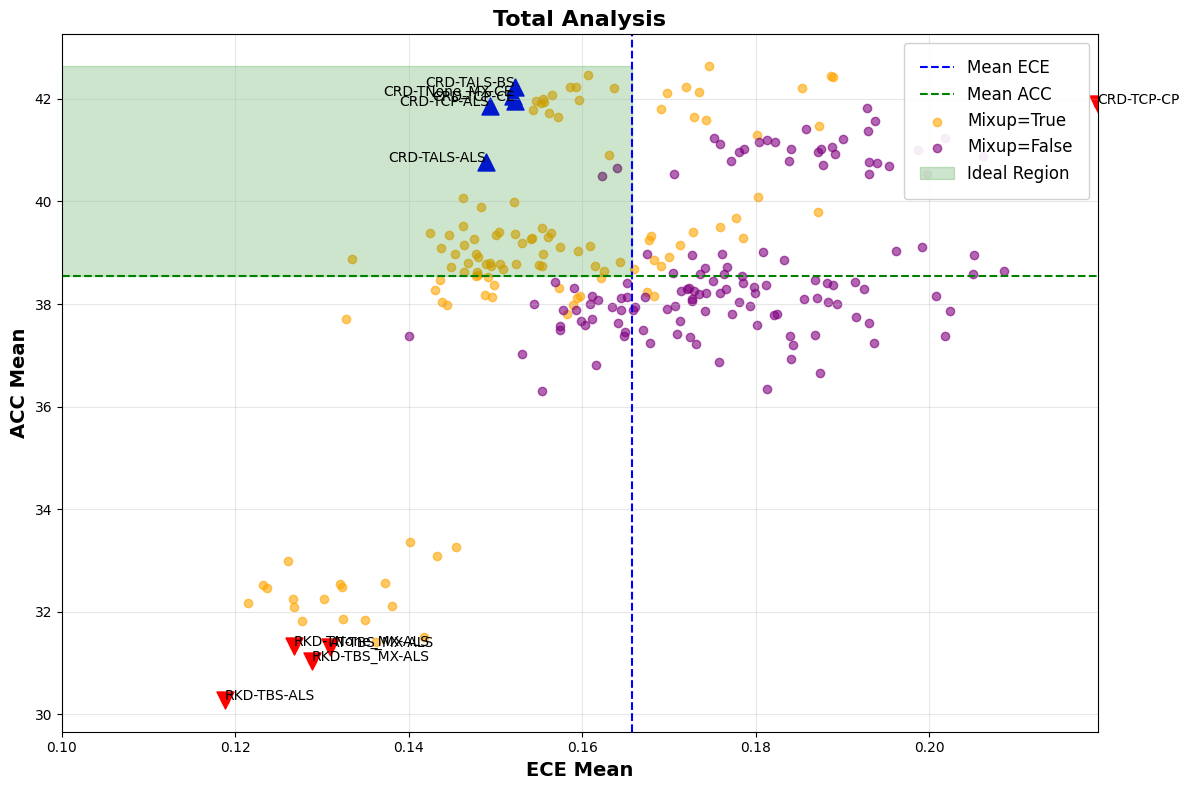

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Mixup 여부에 따른 데이터 분리
mixup_true = df[df["Mixup"] == "Mixup=True"]
mixup_false = df[df["Mixup"] == "Mixup=False"]

# Mixup=True 데이터 표시
plt.scatter(mixup_true["ECE Mean"], mixup_true["ACC Mean"], color="orange", alpha=0.6, label="Mixup=True")

# Mixup=False 데이터 표시
plt.scatter(mixup_false["ECE Mean"], mixup_false["ACC Mean"], color="purple", alpha=0.6, label="Mixup=False")

# Top 5 Harmonic Scores 강조
for i, row in top_5_normalized.iterrows():
    student_calibration_abbr = {
        "ALS": "ALS",
        "BalancedSoftmax": "BS",
        "ConfidencePenalty": "CP",
        "CE": "CE"
    }.get(row["Student Calibration"], row["Student Calibration"])
    label = f"{row['KD Method']}-{row['Teacher Calibration']}-{student_calibration_abbr}"
    plt.scatter(row["ECE Mean"], row["ACC Mean"], color="blue", marker="^", s=150, label="Top 5 Harmonic Scores" if i == 0 else "")
    plt.text(row["ECE Mean"], row["ACC Mean"], label, fontsize=10, ha="right")

# Bottom 5 Harmonic Scores 강조
for i, row in bottom_5_normalized.iterrows():
    student_calibration_abbr = {
        "ALS": "ALS",
        "BalancedSoftmax": "BS",
        "ConfidencePenalty": "CP",
        "CE": "CE"
    }.get(row["Student Calibration"], row["Student Calibration"])
    label = f"{row['KD Method']}-{row['Teacher Calibration']}-{student_calibration_abbr}"
    plt.scatter(row["ECE Mean"], row["ACC Mean"], color="red", marker="v", s=150, label="Bottom 5 Harmonic Scores" if i == 0 else "")
    plt.text(row["ECE Mean"], row["ACC Mean"], label, fontsize=10, ha="left")

# 평균선
plt.axvline(df["ECE Mean"].mean(), color="blue", linestyle="--", linewidth=1.5, label="Mean ECE")
plt.axhline(df["ACC Mean"].mean(), color="green", linestyle="--", linewidth=1.5, label="Mean ACC")

# Ideal Region 표시 (ECE <= 0.15 AND ACC >= ACC 평균)
ece_threshold = df["ECE Mean"].mean()
acc_threshold = df["ACC Mean"].mean()

plt.fill_betweenx(
    y=[acc_threshold, df["ACC Mean"].max()],  # ACC 범위
    x1=0, x2=ece_threshold,                  # ECE 범위
    color='green', alpha=0.2, label="Ideal Region"
)

# 그래프 설정
plt.title("Total Analysis", fontsize=16, fontweight="bold")
plt.xlabel("ECE Mean", fontsize=14, fontweight="bold")
plt.ylabel("ACC Mean", fontsize=14, fontweight="bold")
plt.xlim(0.10, df["ECE Mean"].max())
plt.legend(fontsize=12, loc="upper right", frameon=True, framealpha=0.9, borderpad=1)
plt.grid(alpha=0.3)
plt.tight_layout()

# 그래프 표시
plt.show()
